<a href="https://colab.research.google.com/github/Titan220/IPL-Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
!pip install chart_studio

In [ ]:
# Some basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('ggplot')

# Replace Plotly imports with Matplotlib
# import chart_studio.plotly as pl
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode

# Comment out the Plotly initialization
# init_notebook_mode(connected=False)

import warnings
warnings.filterwarnings("ignore")

# Your existing code using Matplotlib



In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve('https://github.com/PrajwalKG/IPL-Data-Analysis-and-Machine-Learning/raw/main/Dataset/IPL%20Ball-by-Ball%202008-2020.csv','deliveries.csv')
urlretrieve('https://github.com/PrajwalKG/IPL-Data-Analysis-and-Machine-Learning/raw/main/Dataset/IPL%20Matches%202008-2020.csv','matches.csv')



('matches.csv', <http.client.HTTPMessage at 0x7e9c206c1330>)

In [ ]:
import pandas as pd
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

In [ ]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(x,y,inplace = True)
deliveries.replace(x,y,inplace = True)

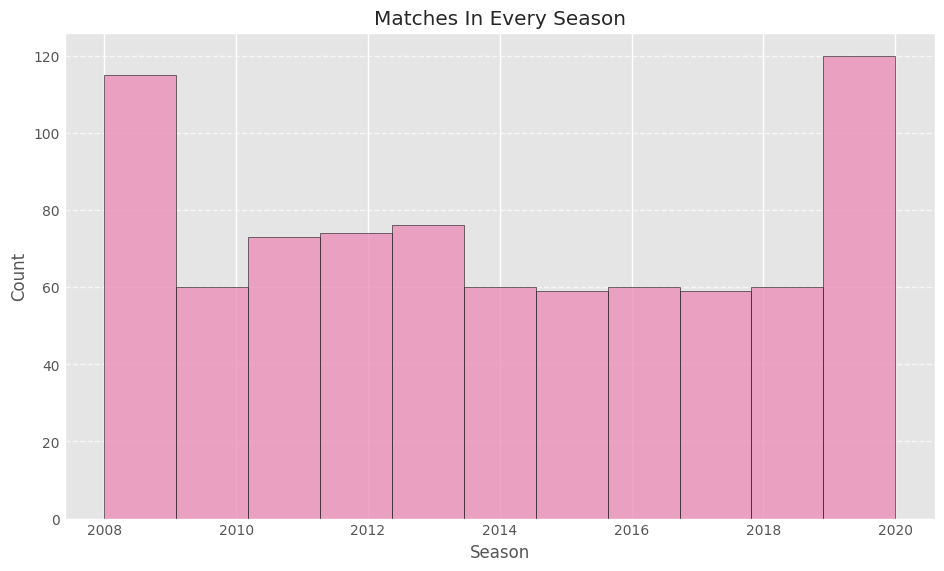

In [ ]:
import matplotlib.pyplot as plt

# Extract season from the date and convert to integer
matches['season'] = matches['date'].str[:4].astype(int)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(matches['season'], bins='auto', color='#EB89B5', edgecolor='#000000', alpha=0.75)

# Set plot details
plt.title('Matches In Every Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


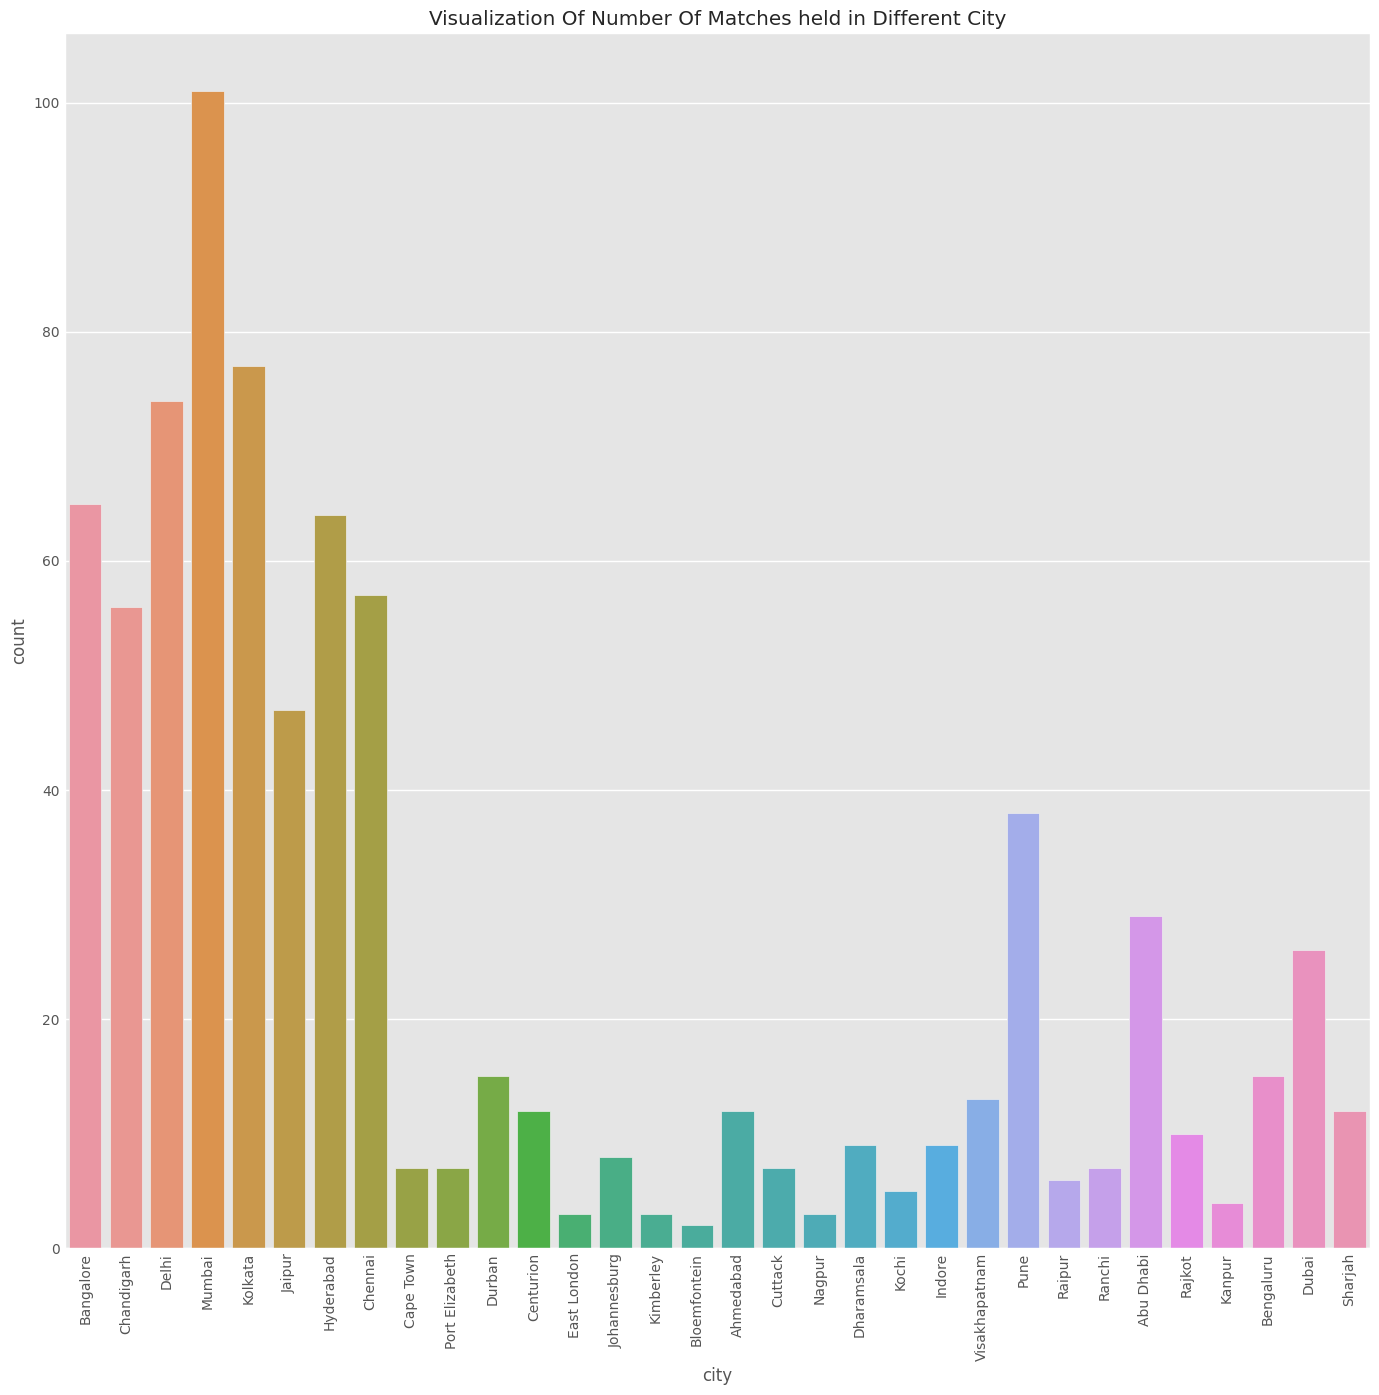

In [ ]:
# Count plot for location
city_others=['others']
matches_df=matches_df[matches_df['city'].isin(city_others)==False]
plt.figure(figsize=(15,15))
plt.title('Visualization Of Number Of Matches held in Different City')
plt.rcParams.update({'font.size': 25})
sns.countplot(x=matches_df['city'])
plt.xticks(rotation=90);

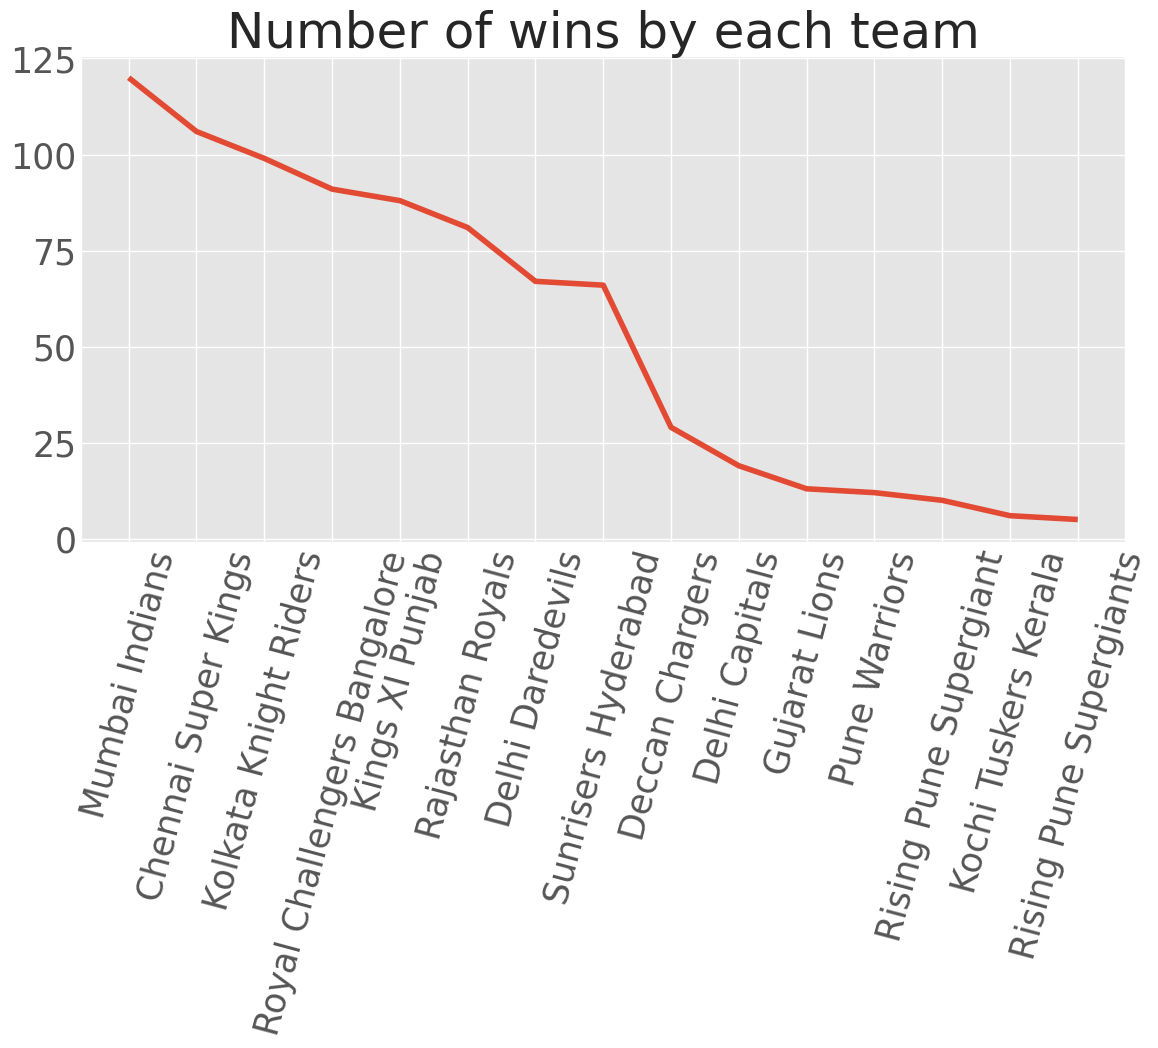

In [ ]:
team_winner = matches_df.winner.value_counts()
team_winner
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Number of wins by each team')
plt.plot(team_winner.index, team_winner);

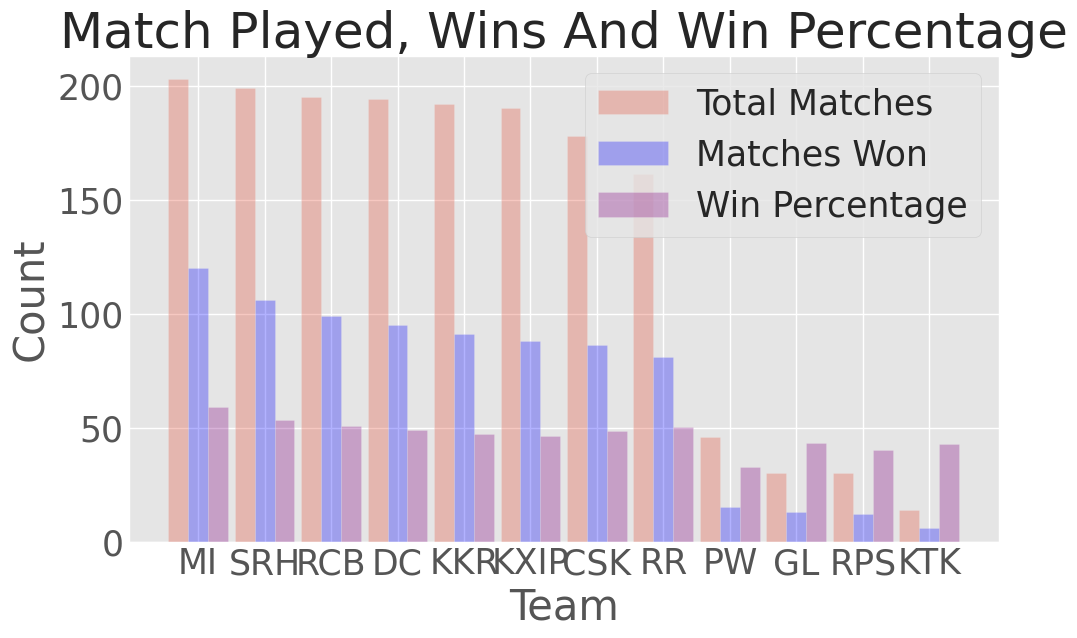

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing data
teams = matches_played.index
total_matches = matches_played['Total Matches']
matches_won = matches_played['wins']
win_percentage = round(matches_won / total_matches * 100, 1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.3
bar_positions1 = np.arange(len(teams))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width

ax.bar(bar_positions1, total_matches, width=bar_width, label='Total Matches', alpha=0.3)
ax.bar(bar_positions2, matches_won, width=bar_width, label='Matches Won', color='blue', alpha=0.3)
ax.bar(bar_positions3, win_percentage, width=bar_width, label='Win Percentage', color='purple', alpha=0.3)

# Set labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Count')
ax.set_title('Match Played, Wins And Win Percentage')
ax.set_xticks(bar_positions2)
ax.set_xticklabels(teams)
ax.legend()

# Show the plot
plt.show()


<Axes: title={'center': 'Teams with maximum number of win in Tosses'}, xlabel='toss_winner', ylabel='count'>

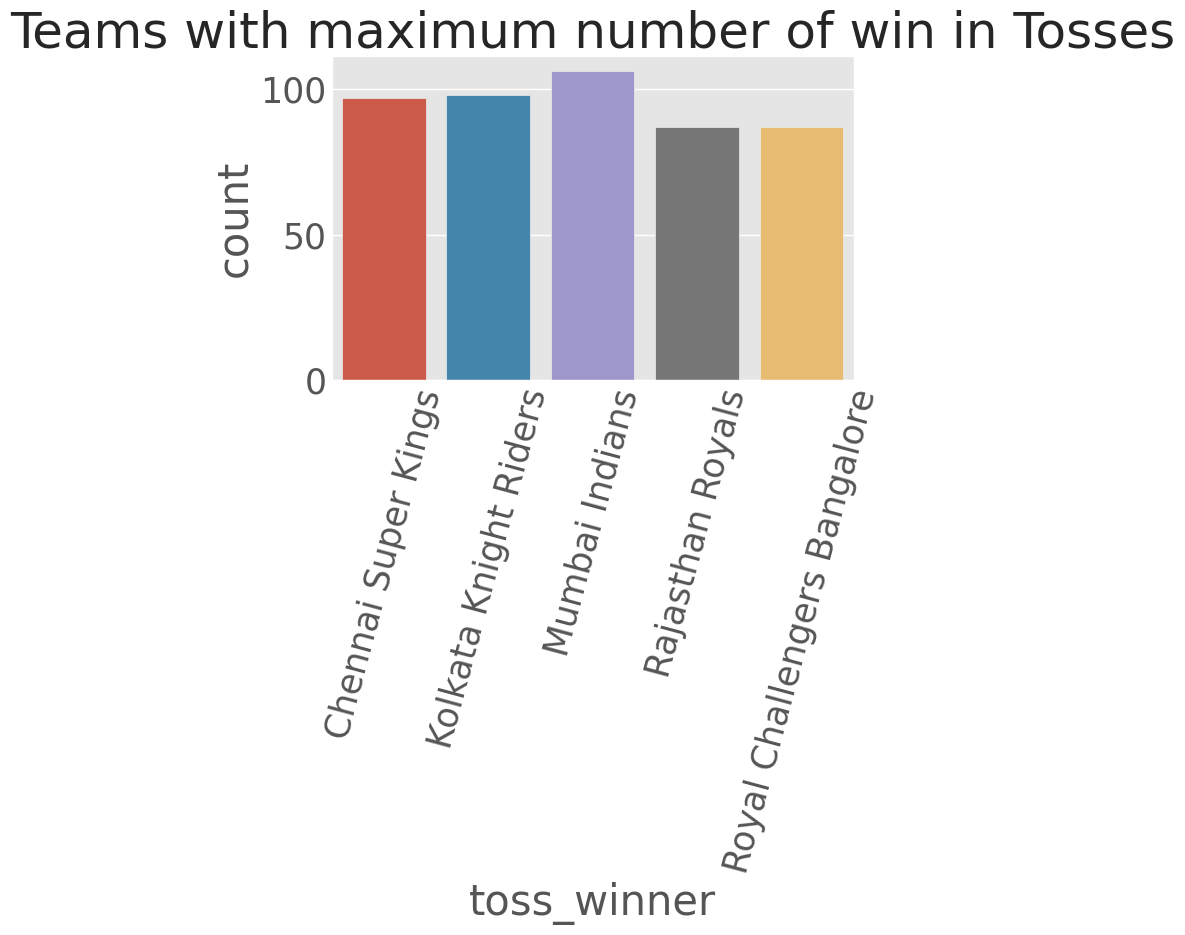

In [ ]:
toss_winner = matches_df.toss_winner.value_counts()
toss_winner.head()
plt.figure(figsize=(6,4))
plt.xticks(rotation=75)
plt.title('Teams with maximum number of win in Tosses')
sns.countplot(x=matches_df['toss_winner'],order = matches_df['toss_winner'].value_counts().iloc[:5].index.sort_values(),)



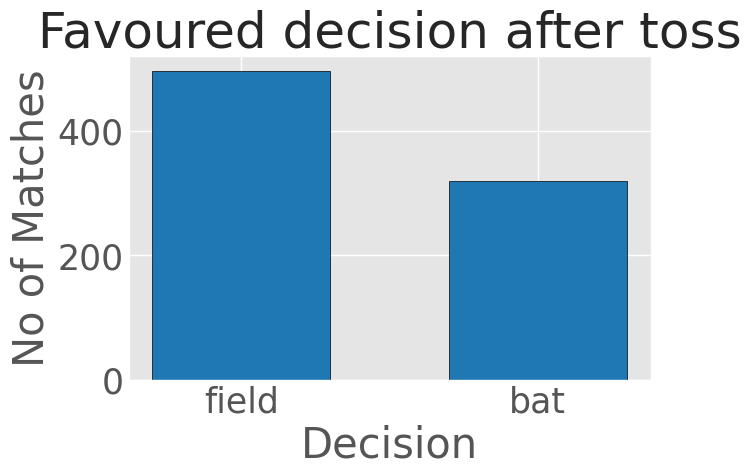

In [ ]:
import matplotlib.pyplot as plt

# Your existing data
toss_decision_counts = matches["toss_decision"].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

bar_color = '#1f77b4'
bar_edge_color = '#000000'
bar_width = 0.6

ax.bar(toss_decision_counts.index, toss_decision_counts.values, color=bar_color, edgecolor=bar_edge_color, width=bar_width)

# Set labels and title
ax.set_xlabel('Decision')
ax.set_ylabel('No of Matches')
ax.set_title('Favoured decision after toss')


# Show the plot
plt.show()


Text(0.5, 1.0, 'Decision to field or bat in each venue')

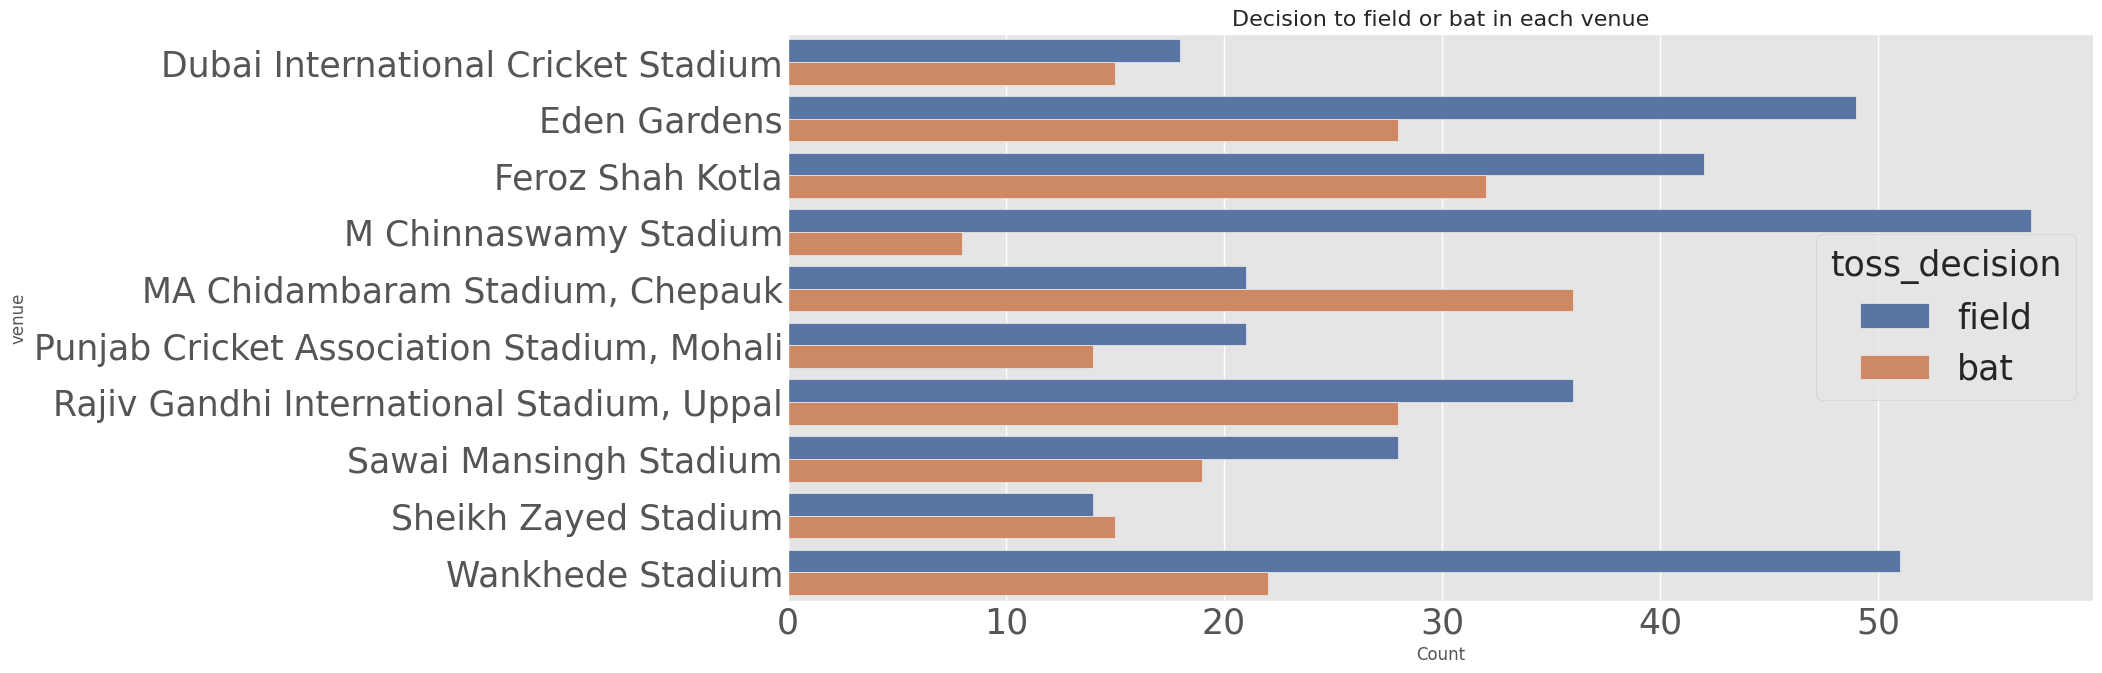

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='venue',
              hue='toss_decision',
              data=matches_df,
              order = matches_df['venue'].value_counts().iloc[:10].index.sort_values(),
              palette='deep')
plt.ylabel('venue',fontsize=12)
plt.xlabel('Count',fontsize=12)
plt.title('Decision to field or bat in each venue', fontsize=16)

<Axes: title={'center': 'Maximum run margin by each team won the match'}, xlabel='winner', ylabel='result_margin'>

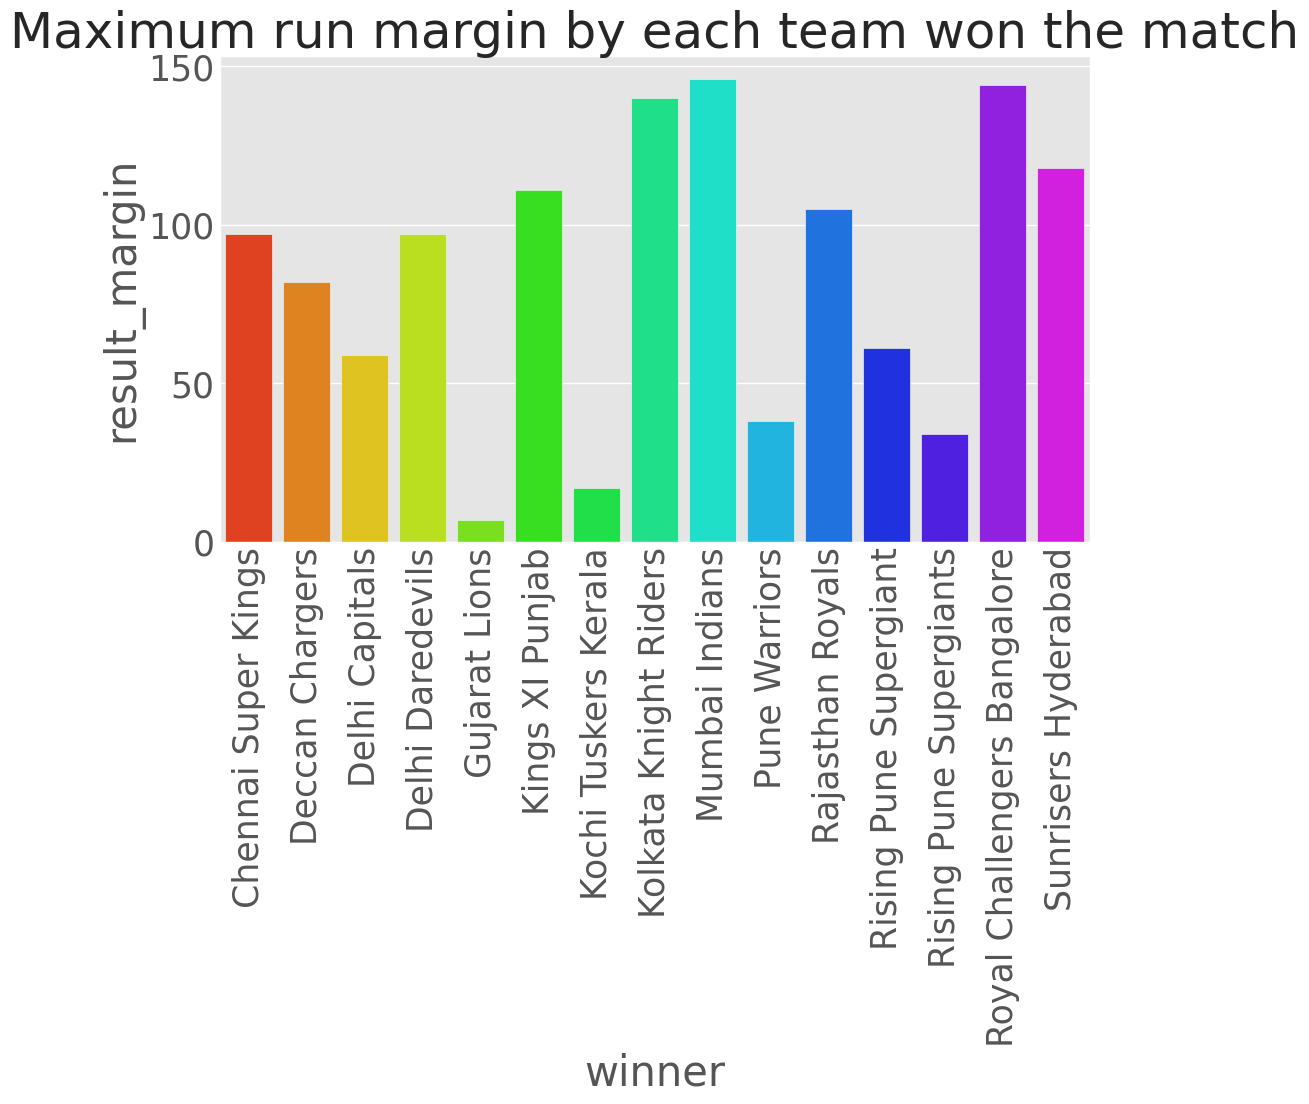

In [ ]:
Result_Margin_df = pd.DataFrame(matches_df.groupby(['winner']).result_margin.max()).reset_index()
Result_Margin_df
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Maximum run margin by each team won the match')
sns.barplot(x='winner',y='result_margin',data = Result_Margin_df, palette = 'gist_rainbow')